# Oracle DB와 python 연동

In [1]:
import cx_Oracle

#한글 지원 방법
import os
os.putenv('NLS_LANG', '.UTF8')

#연결에 필요한 기본 정보(유저, 비밀번호, 데이터베이스 서버 주소)

connection = cx_Oracle.connect('scott/tiger@localhost:1521/xe')
#connection = cx_Oracle.connect('hr/hr@localhost:1521/xe')
cursor = connection.cursor()

sql = "select * from tbl_friend"
#sql = "select * from myai4"


# Update query
#sql = "update tbl_friend set f_addr='서울', f_age=50 where f_num=3"

cursor.execute(sql)

for row in cursor:
    for i in range(len(row)):
        print(row[i], end = ' ')
    print()
    
cursor.close()
connection.close

2 김건희 010-1111-1111 서울 50 
3 임초록 010-1111-1111 광주 28 
20 나길동 010-4564-7682 광주 24 
100 김건희 010- 서울 29 


<function Connection.close>

# Web Crawling

In [1]:
import urllib.request
from bs4 import BeautifulSoup

num = 0
s = []
lst = []

for i in range(200):
    num += 1
    url = f"http://www.11st.co.kr/browsing/OpenContReviewAction.tmall?method=getProductReviewList&prdNo=1515610822&page={num}&pageSize=10&reviewDispYn=Y&dispCtgrNo=&prdEvlPnt=&buyGrdCd=&reviewType=&searchText=&pageListStr=&isPreview=&reviewOptDispYn=&optSearchBtnAndGraphLayer=&reviewBottomBtn=&openDetailContents=&orderCondition=R&searchType=01&evtCd="

    html = urllib.request.urlopen(url).read()

    soup = BeautifulSoup(html, "html.parser") 

    all_divs = soup.find_all("a", {"id":"goReviewDetail"})
    all_stars = soup.find_all("span", 'ico_rev_star')
    
    for j in range(5):
        a = all_divs[j].text.strip()
        if a:
            s.append(a)
            lst.append(int(soup.find_all("span", 'ico_rev_star')[j]['class'][1][-1]))
        
        else:
            continue

print(s)
print(lst)

['가성비 좋아요', '배송도 빠르고 튼튼해보여서 만족합니다', '색상은 화면그대로라 지금 신기에는 맞는 색상이네요.   가격이 저렴해 좋긴한데 품질은 그닥.. 그냥 데일리용으로 신고 있네요.', '무늬도 맘에 들고 재질도 괜찮아요~ 사실 남자들 발목 양말은 금방 목이 늘어나서 안 사고 싶은데, 여름에는 아무래도 짧은 바지 많이 입으니 어쩔 수 없이 사게 되는거 같아요~', '가성비 좋네요. 막 신기 좋을 듯 합니다.  알하고 나눠 씁니다.', '빠른배송에 가격까지 착해서 담에도 구매할게요~~', '아내가 발목까지만 오는 양말이 필요하다고 해서 주문하였는데, 맘에 들어 하네요. 색상도 밝은 회색으로 괜찮고,  양말의 질도 괜찮네요.  가성비 최고입니다 . 포장은 단순하게', '방금 도착했어요.', '배송빠르고  싸게 여러개 마니 사서 한동안  오래신을것같아요  괜찮네요', '시중보다저렴하게 잘삿어요', '학교 신고다닐 양말인데 괜찬아요 배송도 빠르고', '가격도 좋구 상태도너무 좋네요!!!!', '가격도저렴하고 얇아서 여름에신기좋을것같아요 ㅋㅋㅋ', '마무리 깔끔하고 배송빠르고 양말 잘마르고 하네요~', '싸고 질도 아주 맘에 들어요딱 진짜 발목양말 길이 짱입니다', '싸고 질도 아주 맘에 들어요딱 진짜 발목양말 길이 짱입니다', '배송빠릅니다치마에 매치할려고 주문', '아이들 학교 곧 갈 수 있어서 바로 주문해보았어요. 빠른배송!!!', '아이 학교간다고하여서 주문해보았어요.그냥 고만고만해요.', '착한가격 착한양말 잘 신겠습니다', '가격 정말 착하네요잘 신을게요', '아주 싸고 좋네요. 같은색으로 열켤레씩 샀으니 오래신을수 있겠네요. 다음에도 여기서 구매 할게요', '아주 싸고 좋네요. 같은색으로 열켤레씩 샀으니 오래신을수 있겠네요. 다음에도 찾을거 같아요', '좋아요 굿 굿 굿 굿굿 좋아요ㅡㅡㅡㅡㅡ', '가장 기본으로 저렴한데다 무료배송이라 좋았어요잘 신을께요', '좋아요', '중목을 원했는데 딱이에요너무 발목양말도 아니고 조하용', '애들 양말 자주 

In [1]:
df.head(10)

NameError: name 'df' is not defined

In [147]:
df['Score'].describe()

count    1304.000000
mean        2.847393
std         1.660019
min         1.000000
25%         1.000000
50%         2.000000
75%         5.000000
max         5.000000
Name: Score, dtype: float64

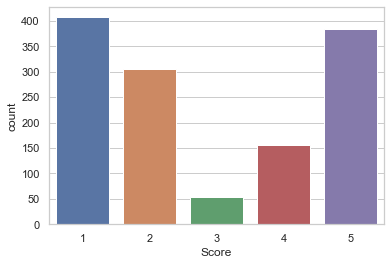

In [73]:
import seaborn as sns
sns.set(style="whitegrid")
sns.countplot(df['Score'])

# 자연어 처리(명사 추출, POS tagging)

In [74]:
corpus = df['Review'].tolist()

In [75]:
from konlpy.tag import Kkma

kkma = Kkma()
print(kkma.sentences(corpus[0]))
print()
print(kkma.nouns(corpus[0]))
print()
print(kkma.pos(corpus[0]))

['가 성비 좋아요']

['성비']

[('가', 'VV'), ('아', 'ECS'), ('성비', 'NNG'), ('좋', 'VA'), ('아요', 'EFN')]


# stopwords list 불러오기

In [76]:
import pandas as pd

stopword_list = pd.read_csv("stopwords.txt",header=None)[0].tolist()

# 문서 단어 행렬(Document-Term Matrix, DTM)의 표기

In [77]:
from sklearn.feature_extraction.text import CountVectorizer


vectorizer = CountVectorizer(stop_words = stopword_list)
X = vectorizer.fit_transform(corpus)

print(vectorizer.get_feature_names())
print(X.toarray())

['1000에', '10컬레', '10컬레를', '10켤레', '10켤레중', '15켤래가', '175기준', '1개', '1년넘게쓰는중', '1년정도가', '1년지나면', '1도', '20컬래', '20컬레', '230에', '240', '240입니당', '245사이즈', '245정도', '275', '280', '280인데', '2개', '35인데', '3켤레', '3회', '500원짜리랑재질은', '5켤레', '5켤레씩', '6개월', 'c해서좋아요', 'dlfloiedufy', 'dmnsfkdjsuhfoehfdsloafjldkjfdknfdksjnfdkjnfhdsjhfkdjxcncvxnvk', 'efrue', 'good', 'h네요', 'is', 'khfoa', 'r8iew', 'slakfdlksfhdsnf', 'so', 'utrfkhdsfkdl', 'we', 'x고', 'ダ鉗캬셀', 'ㄱㅈㅂㄴㅅㄷㄴㄷㅅㄷㅅㄴㄷㅅㄴㄷ늣ㅈㅅㄴㅅㅈㅅㄷㅅㅂㄴㅈㅅㅈㄹㅅㅌㄱㄴㅌㄱㄷㅎㄷㅂㄷㅅㅂㄷㅈㅂㄴㅅㄴㄷㅅㅈㄴㄷㅊㄱㄴㅅㅈㄷㅂㄴㅅㅈㅅㄴㄷㅆㄷㄴㅅㄴ', 'ㄷㄱ', 'ㅅㅋㅋ', 'ㅈㅎ금', 'ㅋㅋ', 'ㅋㅋㅋ', 'ㅋㅋㅋㅋㅋ', 'ㅋㅋㅋ근데', 'ㅎㅎ', 'ㅎㅎㅎ', 'ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎ', 'ㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎㅎ', 'ㅎㅎ좋아요', 'ㅑ셔셔ㅑ샤ㅑ셔ㅑ셔샤ㅕㅕ샤ㅕ샤ㅑㅕㅕㅑㅅ셔ㅑ', 'ㅠㅠ', 'ㅡa그래서', '鄲六', '가격', '가격까지', '가격대비', '가격대비만족합니다', '가격대비좋네요', '가격대비좋아요', '가격도', '가격도저렴하고', '가격도조아요', '가격만큼', '가격만큼해요', '가격싸고', '가격에', '가격으로', '가격은', '가격이', '가격이나', '가격이며', '가격이면', '가격저', '가격저렴하고', '가격저렴해요', '가깝기', '가끔신고버리기에는너무좋은듯요', '가락과', '가벼운', '가볍게', '가성비', '가성비가', '가성비는', '가성비대비', '가성비도', '가성비좋네요', '가성비짱', '가성비최고', '가성비최

C:\Users\SM129\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['가서', '같은', '것과', '결과에', '결론을', '관계가', '관련이', '그런', '그럼에도', '그렇게', '그에', '그치지', '김에', '까닭에', '낫다', '년도', '논하지', '누가', '다시', '달려', '대로', '대해', '되는', '되다', '되어', '들면', '들자면', '듯하다', '따르는', '따름이다', '따지지', '때가', '만은', '만이', '만큼', '많은', '말하면', '말할것도', '몰라도', '몰랏다', '못하다', '미치다', '바꾸어서', '바꿔', '밖에', '방면으로', '보면', '보아', '부류의', '비길수', '비추어', '뿐만', '사람들', '상대적으로', '생각이다', '서술한바와같이', '쓰여', '아니다', '아니라', '안다', '안된다', '않고', '않기', '않는다면', '않다', '않다면', '않도록', '않으면', '알겠는가', '어쩔수', '어찌됏든', '없고', '없다', '예를', '외에', '요만한', '우에', '위에서', '이렇게', '이로', '이르다', '이와', '이유는', '인하여', '임에', '점에서', '정도에', '정도의', '종합한것과같이', '주저하지', '줄은', '지경이다', '틀림없다', '편이', '하고', '하기', '하기만', '하는', '하는것만', '하는것이', '하다', '하면', '하지', '한하다', '할수록', '함으로써', '해도', '해서는', '형식으로', '힘이'] not in stop_words.
  'stop_words.' % sorted(inconsist

# 워드 클라우드

(-0.5, 999.5, 299.5, -0.5)

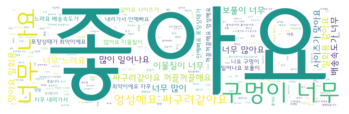

In [78]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

text = " ".join(corpus)

# Generate a word cloud image
wordcloud = WordCloud(max_font_size=400, font_path = 'C:/Users/SM129/0708_python/bccard_font/win/BCCardL.ttf',
                     background_color = 'white',
                     width = 1000,
                     height = 300,
                     ).generate(text)

# Display the generated image:
# the matplotlib way:

fig = plt.figure()
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
# plt.savefig('C:/Users/SM129/0708_python/wordcloud_ex1.svg')

# 리뷰점수에 따른 word별 긍부정 check

In [150]:
R_df.columns = vectorizer.get_feature_names()
R_df

,1000에,10컬레,10컬레를,10켤레,10켤레중,15켤래가,175기준,1개,1년넘게쓰는중,1년정도가,...,흰색이네영,흰색이네요,흰양말,흰양말만,흰양말샀는데,흰양말을시켯는데,힌색이나,힌양말,힘들어서,힘들어요
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1299,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1300,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1301,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1302,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [79]:
R = X.toarray()
print(R.shape)

R_df = pd.DataFrame(R)

(1304, 1622)


In [80]:
test = np.zeros(R_df.shape)

num_word = R_df[R_df == test].fillna(1).sum(axis=0)
n_W = sum(num_word)
print(n_W)
print(num_word)

5501.0
0       1.0
1       1.0
2       1.0
3       4.0
4       1.0
       ... 
1617    1.0
1618    1.0
1619    1.0
1620    1.0
1621    1.0
Length: 1622, dtype: float64


In [81]:
R = X.toarray()
R

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [82]:
R = R * np.array(df['Score']).reshape(-1,1)
R.sum()

17225

In [83]:
E_W = R.sum() / n_W
E_W

3.1312488638429374

In [84]:
S_W = ((R - E_W)**2/(n_W-1)).sum()
S_W

3766.573804187071

In [87]:
from scipy import stats

T_w = []

alpha = 0.999

for i in range(len(R[0])):
    R_t = np.array(list(R[:i]) + list(R[i+1:]))
    n_w = n_W - num_word[i]
    E_w = R_t.sum() / n_w
    S_w = ((R_t - E_w)**2/(n_w-1)).sum()
    t = (E_W - E_w) / np.sqrt(S_W/n_W + S_w/n_w)
    v = (S_W/n_W + S_w/n_w)**2 / ((S_W/n_W)**2/(n_W-1) + (S_w/n_w)**2/(n_w-1))
    val = stats.t.cdf(t, v)
    
    if alpha/2 < val < 1-alpha/2:
        T_w.append(["Neutral", t])
    elif val < alpha/2:
        T_w.append(["Negative", t])
    else:
        T_w.append(["Positive", t])
    
T_w[:10]

[['Neutral', 0.0010675247667660188],
 ['Positive', 0.0026224602197295055],
 ['Positive', 0.006513733878212742],
 ['Positive', 0.017538993121980633],
 ['Positive', 0.005735034100046743],
 ['Positive', 0.0034002657448778143],
 ['Positive', 0.01587582313976273],
 ['Neutral', 0.0007566456720879995],
 ['Positive', 0.004489570197121384],
 ['Neutral', 0.0010675247667660188],
 ['Positive', 0.004178296534162642],
 ['Positive', 0.0026224602197295055],
 ['Positive', 0.0026224602197295055],
 ['Positive', 0.0032446856788532607],
 ['Positive', 0.006513740974026582],
 ['Positive', 0.006513740974026582],
 ['Positive', 0.001378439607341882],
 ['Positive', 0.0034002657448778143],
 ['Positive', 0.0020003775702704058],
 ['Positive', 0.001378439607341882],
 ['Positive', 0.0020003775702704058],
 ['Positive', 0.008851214543794481],
 ['Positive', 0.008071831147297023],
 ['Positive', 0.001844879909956037],
 ['Positive', 0.004178296534162642],
 ['Neutral', 0.00013499573956874392],
 ['Positive', 0.00417829653416

In [152]:
# 부정 단어 20개 나열

idx = pd.DataFrame(T_w).sort_values(1).index
sorted_T_w = np.array(pd.DataFrame(T_w).sort_values(1))
sorted_word_lst = np.array(vectorizer.get_feature_names())[idx].reshape(-1,1)
result = np.concatenate([sorted_T_w, sorted_word_lst], axis=1)
result = pd.DataFrame(result)
result.columns = ['긍부정', 'T', '단어']

result.head(10)

,긍부정,T,단어
0,Negative,-0.200641,너무
1,Negative,-0.0598117,많이
2,Negative,-0.0534848,좋아요
3,Negative,-0.0506227,같아요
4,Negative,-0.0496567,구멍이
5,Negative,-0.0491706,사이즈가
6,Negative,-0.048626,최악이에요
7,Negative,-0.048626,포장상태가
8,Negative,-0.0485062,자꾸
9,Negative,-0.0481984,보풀이


In [155]:
# 중립 단어 20개 나열

result.loc[500:519,:]

,긍부정,T,단어
500,Neutral,-0.000351571,싫어서
501,Neutral,-0.000351571,알듯
502,Neutral,-0.000351571,이만하면
503,Neutral,-0.000351571,알았는데
504,Neutral,-0.000351571,이쁘네요
505,Neutral,-0.000351571,인데
506,Neutral,-0.000351571,이가격에
507,Neutral,-0.000204102,ㅎㅎ
508,Neutral,-0.000204102,괜찮아요
509,Neutral,-0.000196186,가벼운


In [156]:
# 긍정 단어 20개 나열
result.tail(20)

,긍부정,T,단어
1602,Positive,0.011971,만족입니다
1603,Positive,0.011971,거예요
1604,Positive,0.011971,가격대비좋네요
1605,Positive,0.0125954,받앗어요
1606,Positive,0.0133375,ㅋㅋㅋ
1607,Positive,0.0135328,늘어짐도
1608,Positive,0.0137292,마음에
1609,Positive,0.0138446,듯좀
1610,Positive,0.0143132,구매해요
1611,Positive,0.0143144,매달


In [130]:
# 긍정

a = np.array(vectorizer.get_feature_names())[idx[:20]]
b = X.toarray().sum(axis = 0)[idx[:20]]
ans_pos = ""
for i in range(20):
    for j in range(int(b[i])):
        ans_pos = ans_pos + " " + a[i]
        
lst = np.array(ans_pos.split())
idxx = list(range(len(lst)))

np.random.shuffle(idxx)
ans_pos = " ".join(lst[idxx])


# 부정

a = np.array(vectorizer.get_feature_names())[idx[-20:]]
b = X.toarray().sum(axis = 0)[idx[-20:]]
ans_neg = ""
for i in range(20):
    for j in range(int(b[i])):
        ans_neg = ans_neg + " " + a[i]

lst = np.array(ans_neg.split())
idxx = list(range(len(lst)))

np.random.shuffle(idxx)
ans_neg = " ".join(lst[idxx])

        
ans_neg

'ㅋㅋㅋ 만족입니다 구매하였습니다제품 마음에 구매해요 매달 10켤레 괜찮은 기사님 10켤레 길이 10켤레 ㅎㅎㅎ 길이 거예요 가격대비좋네요 구입했네요 괜찮은 10켤레 10켤레 10켤레 10켤레 ㅋㅋㅋ 듯좀 ㅋㅋㅋ ㅎㅎㅎ 받앗어요 구입했네요 마음에 마음에 마음에 구입했는데 늘어짐도 마음에 175기준 마음에 구입했네요 10켤레 말고 매달 마음에'

In [126]:
lst = np.array(ans_pos.split())
idx = list(range(len(lst)))

np.random.shuffle(idx)
ans_pos = " ".join(lst[idx])


array(['일회용', '최악이에요', '일어나요', ..., '같아요', '이물질이', '많이'], dtype='<U6')

<Figure size 432x288 with 0 Axes>

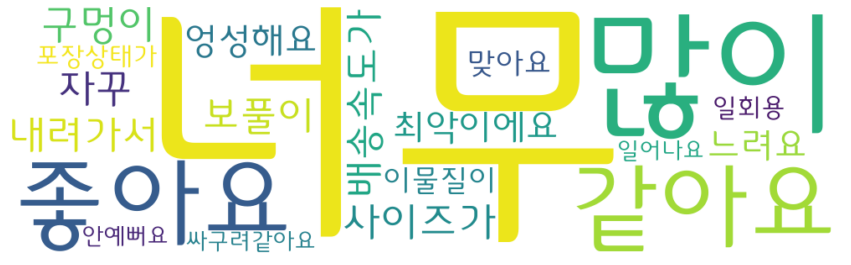

In [144]:
# positive wordcloud
wordcloud_pos = WordCloud(max_font_size=400, font_path = 'C:/Users/SM129/0708_python/bccard_font/win/BCCardL.ttf',
                     background_color = 'white',
                     
                    width = 1000,
                     height = 300,
                     ).generate(ans_pos)

fig = plt.figure()
plt.figure(figsize=(15,12))
plt.tight_layout(pad=0)

plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.savefig('image_pos.png', bbox_inches='tight')

<Figure size 432x288 with 0 Axes>

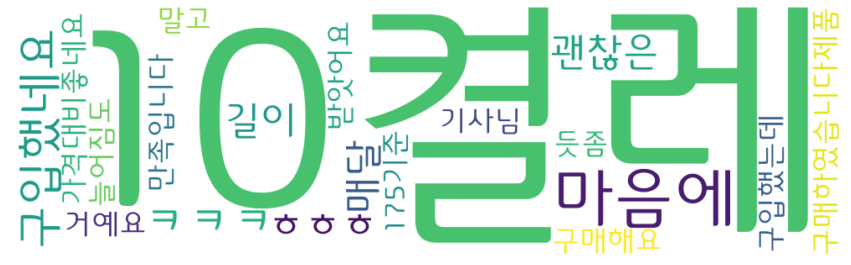

In [145]:
# negative wordcloud
wordcloud_neg = WordCloud(max_font_size=400, font_path = 'C:/Users/SM129/0708_python/bccard_font/win/BCCardL.ttf',
                     background_color = 'white',
                     
                    width = 1000,
                     height = 300,
                     ).generate(ans_neg)

fig = plt.figure()
plt.figure(figsize=(15,12))
plt.tight_layout(pad=0)

plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.savefig('image_neg.png', bbox_inches='tight')